In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\micky\Desktop\碩士\109-2\MahcineLearning\Course7-Dimensinality Reduction\ANSUR_II_FEMALE.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Branch                          1986 non-null   object 
 1   Component                       1986 non-null   object 
 2   Gender                          1986 non-null   object 
 3   abdominalextensiondepthsitting  1986 non-null   int64  
 4   acromialheight                  1986 non-null   int64  
 5   acromionradialelength           1986 non-null   int64  
 6   anklecircumference              1986 non-null   int64  
 7   axillaheight                    1986 non-null   int64  
 8   balloffootcircumference         1986 non-null   int64  
 9   balloffootlength                1986 non-null   int64  
 10  biacromialbreadth               1986 non-null   int64  
 11  bicepscircumferenceflexed       1986 non-null   int64  
 12  bicristalbreadth                19

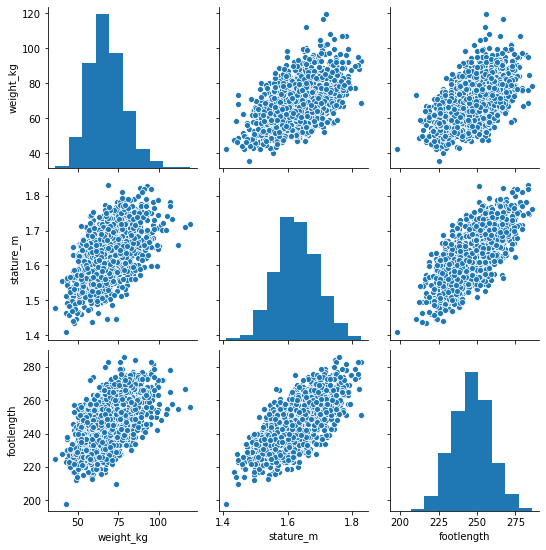

In [7]:
#先透過基本的圖來做EDA看feature之間的關係
import seaborn as sns
df_s = df[['Gender','weight_kg','stature_m','footlength']]
sns.pairplot(df_s, diag_kind='hist')

In [15]:
from sklearn.manifold import TSNE
non_numeric = ['Branch', 'Gender', 'Component','BMI_class','Height_class']

df_numeric = df.drop(non_numeric, axis=1)

m = TSNE(learning_rate = 50)

tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)


(1986, 2)


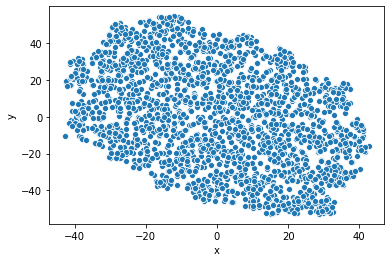

In [28]:
tsdf = pd.DataFrame(tsne_features, columns = ['x','y'])
sns.scatterplot(x="x", y="y", data=tsdf)

In [39]:
df_label = df[['Branch','Component','BMI_class','Height_class']]
df_ts = pd.concat([df_label,tsdf], axis = 1)
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Branch        1986 non-null   object 
 1   Component     1986 non-null   object 
 2   BMI_class     1986 non-null   object 
 3   Height_class  1986 non-null   object 
 4   x             1986 non-null   float32
 5   y             1986 non-null   float32
dtypes: float32(2), object(4)
memory usage: 173.1+ KB


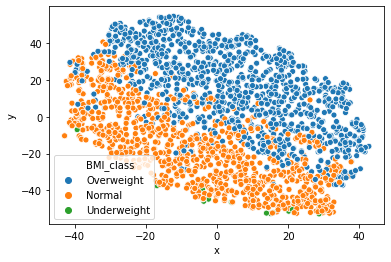

In [42]:
sns.scatterplot(x="x", y="y",hue = 'BMI_class' ,data=df_ts)

#藉由tsne降維後，再利用類別行的資料來做區別，找出重要特徵